# This is my take on the california housing dataset 

# Importing libraries #


In [1]:
import os
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating directory for data (if it doesn't exist) and downloading data #

In [2]:
# Url of csv file to retrieve
csv_url = "https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-California-Housing-Prices/master/Data/housing.csv"
housing_path = os.path.join("datasets", "Californication")
file_name = "californian_housing_data.csv"
def fetch_data(url,path,name):
    if not os.path.isdir(path):
            os.makedirs(path)
    # Define the local filename  to save data
    csv_file_path = os.path.join(path,name)
    # Download csv and save locally in file path
    request.urlretrieve(url, csv_file_path)
    print(name,'downloaded at',housing_path)

In [3]:
fetch_data(csv_url,housing_path,file_name)

californian_housing_data.csv downloaded at datasets/Californication


In [4]:
housing_csv = os.path.join(housing_path,file_name)
housing = pd.read_csv(housing_csv)

In [5]:
housing_raw = housing
housing
print("Housing features in 20640 California districts")

Housing features in 20640 California districts


# Data cleaning # 
Discarding of entries with na feature

In [6]:
print("\n There are 20433 entries of the 'total bedrooms' feature in comparison to the 20640 entries of the other features\n")
print(housing.info())
print('Lets drop the subset of entries of entries with na total_bedrooms')
housing=housing.dropna(subset=["total_bedrooms"]) # dropping subset of entris with na total_bedrooms
print(housing.count())
print("\n We have total 20433 entries where every feature is complete\n")



 There are 20433 entries of the 'total bedrooms' feature in comparison to the 20640 entries of the other features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
Lets drop the subset of entries of entries with na total_bedrooms
longitude             20433
latitude              20433
housing_

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

# Data cleaning # 
Discarding of entries with capped labels

In [8]:
print("\nThere are 958 cases of house values that are capped.This may be a serious problem since it is the target attribute.\
Machine Learning algorithms may learn that prices never go beyond that limit. ")
print("\nLet's discard them.\n")
print("These are the 5 highest entries.\n")
print(housing["median_house_value"].value_counts()[housing["median_house_value"].value_counts().index[:5]])
capped_values_indices = housing[housing["median_house_value"]==500001.0].index
housing = housing.drop(capped_values_indices)
print("\nThese are the 5 highest entries now.\n")
print(housing["median_house_value"].value_counts()[housing["median_house_value"].value_counts().index[:5]])


There are 958 cases of house values that are capped.This may be a serious problem since it is the target attribute.Machine Learning algorithms may learn that prices never go beyond that limit. 

Let's discard them.

These are the 5 highest entries.

500001.0    958
137500.0    119
162500.0    116
112500.0    103
187500.0     92
Name: median_house_value, dtype: int64

These are the 5 highest entries now.

137500.0    119
162500.0    116
112500.0    103
187500.0     92
225000.0     91
Name: median_house_value, dtype: int64


In [9]:
print("\nThere are 1096 cases of house ages that are capped. This may be a serious problem.\
Machine Learning algorithms may learn that ages never go beyond that limit. ")
print("\nLet's discard them!\n")
print("\nThese are the 5 highest entries.\n")
print(housing["housing_median_age"].value_counts()[housing["housing_median_age"].value_counts().index[:5]])
capped_age_indices = housing[housing["housing_median_age"]==52.0].index
housing = housing.drop(capped_age_indices)
print("\nThese are the 5 highest entries now.\n")
print(housing["housing_median_age"].value_counts()[housing["housing_median_age"].value_counts().index[:5]])




There are 1096 cases of house ages that are capped. This may be a serious problem.Machine Learning algorithms may learn that ages never go beyond that limit. 

Let's discard them!


These are the 5 highest entries.

52.0    1096
36.0     816
35.0     783
16.0     747
17.0     680
Name: housing_median_age, dtype: int64

These are the 5 highest entries now.

36.0    816
35.0    783
16.0    747
17.0    680
34.0    642
Name: housing_median_age, dtype: int64


# Visualisation of Data # 

Let's get a feel of the type of data we are dealing with by plotting a histogram for each numerical attribute.


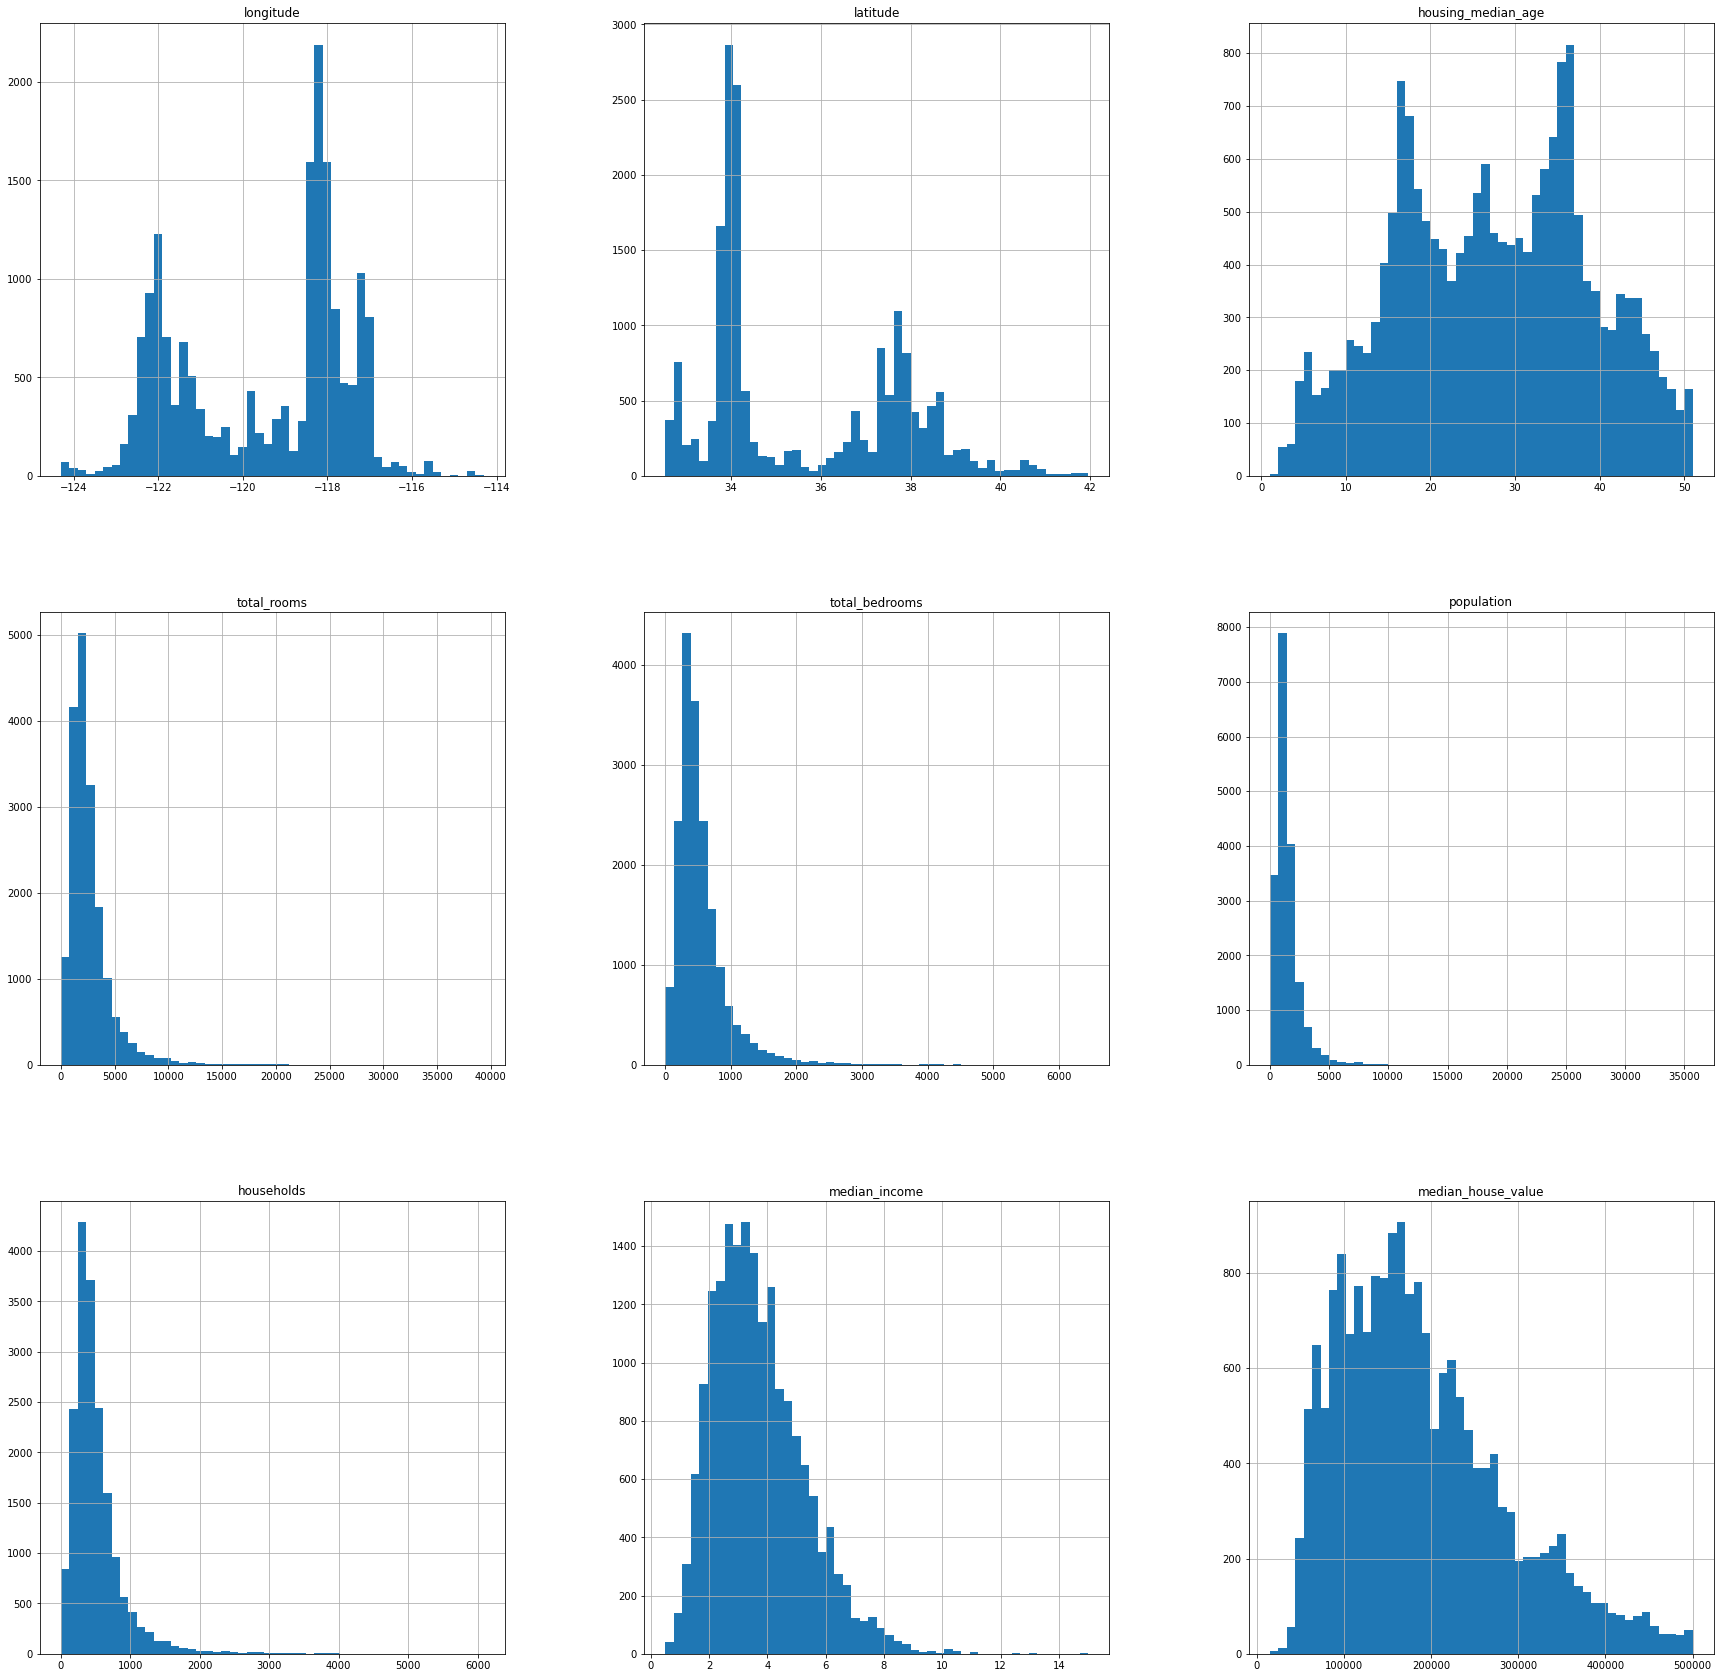

Most of them are Poisson distributions, which actually makes sense given the fact that they describe large populations that follow the law of large numbers.


In [10]:
import matplotlib.pyplot as plt
print("Let's get a feel of the type of data we are dealing with by plotting a histogram for each numerical attribute.")
housing.hist(bins=50, figsize=(30,30))
plt.show()
print('Most of them are Poisson distributions, which actually makes sense given the fact that they describe large populations that follow the law of large numbers.')

Let's plot a scatterplot for the longitude and latitude attributes


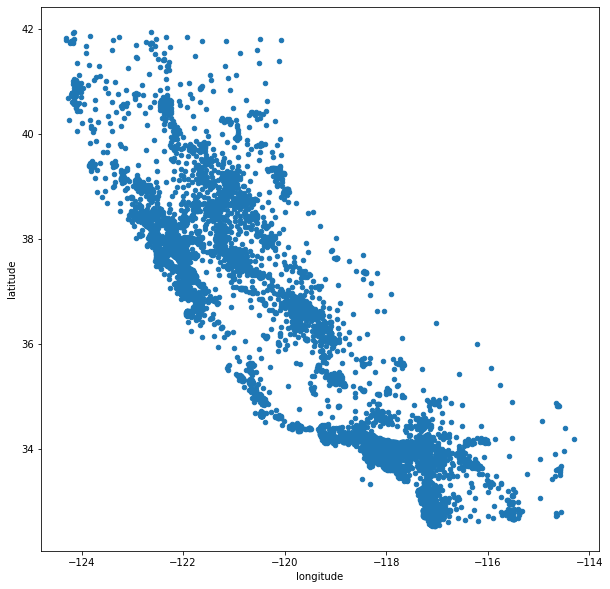

It's clear that the dots form the coast line of California


In [11]:
print("Let's plot a scatterplot for the longitude and latitude attributes")
housing.plot(kind="scatter",x='longitude',y='latitude',figsize=(10,10))
plt.show()
print("It's clear that the dots form the coast line of California")

# Map of California  

For completeness sake let's superimpose the data over a map of California!


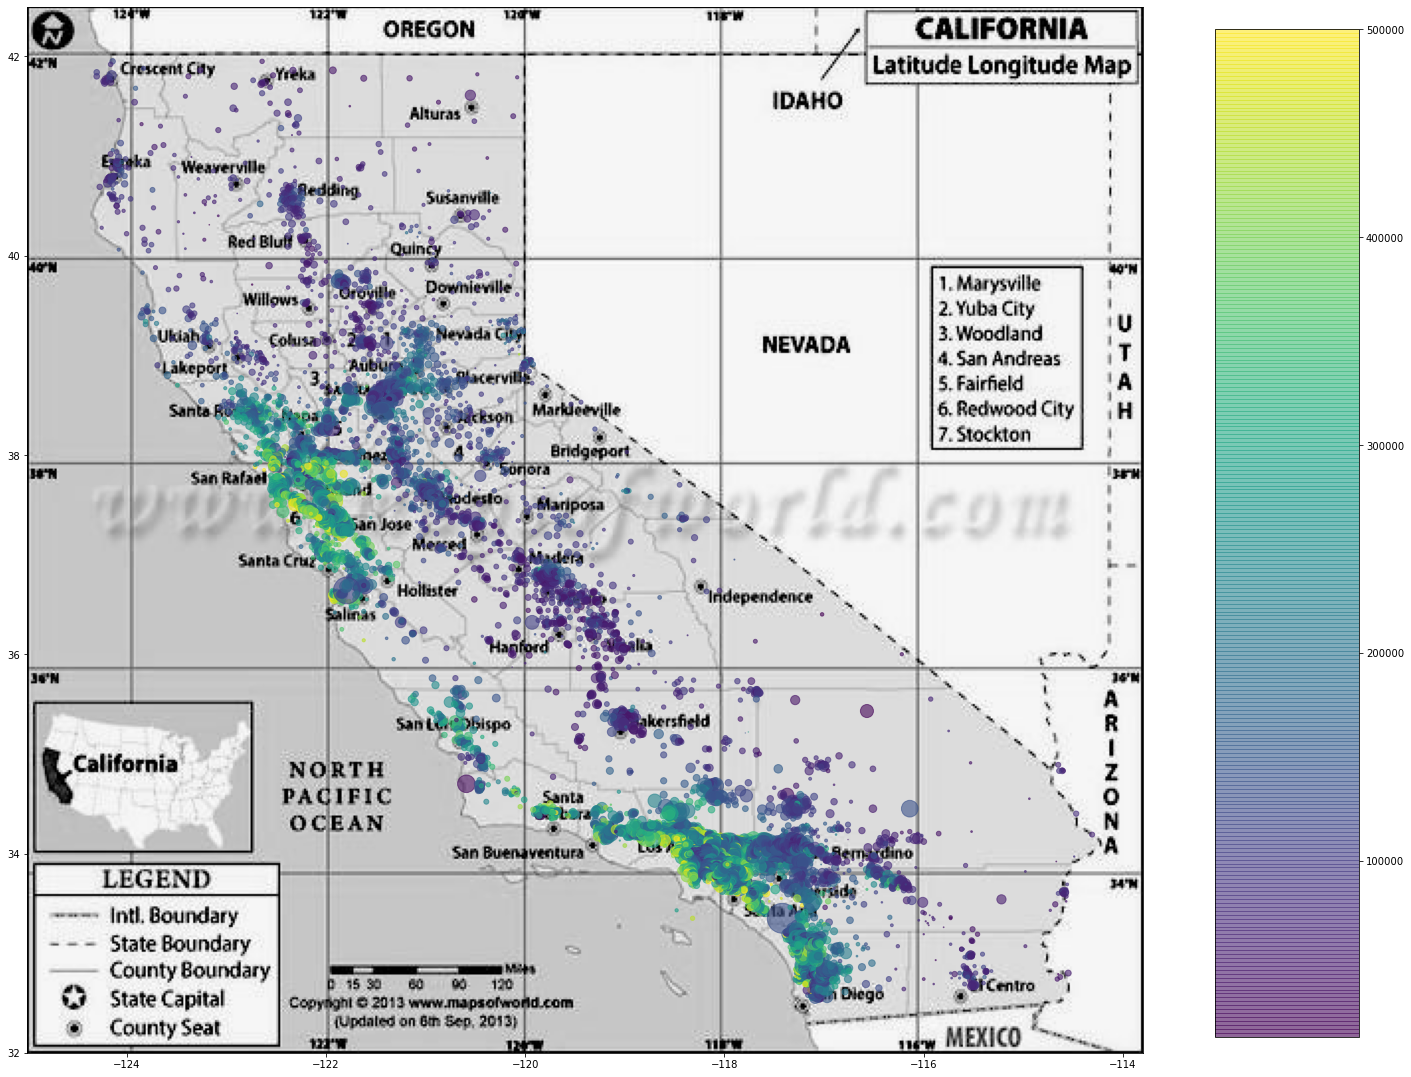

In [12]:
print("For completeness sake let's superimpose the data over a map of California!")

img = plt.imread("datasets/Californication/california_map.jpg")
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(img,extent=[-125, -113.8, 32, 42.5])
plot = ax.scatter(housing['longitude'],housing['latitude'],alpha=0.6
           ,c=housing["median_house_value"],cmap=plt.get_cmap("viridis")
           ,s=housing["population"]/40)
#fig.colorbar(fig, cax=None)


cb_ax = fig.add_axes([0.95, 0.15, 0.1, 0.7])
cbar = fig.colorbar( plot, cax=cb_ax  )

# Feature Corellation 

In [13]:
print("Lets look for corellations between feature 'Median House Value' and other features.\n")
corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

Lets look for corellations between feature 'Median House Value' and other features.

median_house_value    1.000000
median_income         0.661027
total_rooms           0.151571
households            0.099076
total_bedrooms        0.079721
population            0.020692
housing_median_age    0.015306
longitude            -0.021329
latitude             -0.172760
Name: median_house_value, dtype: float64


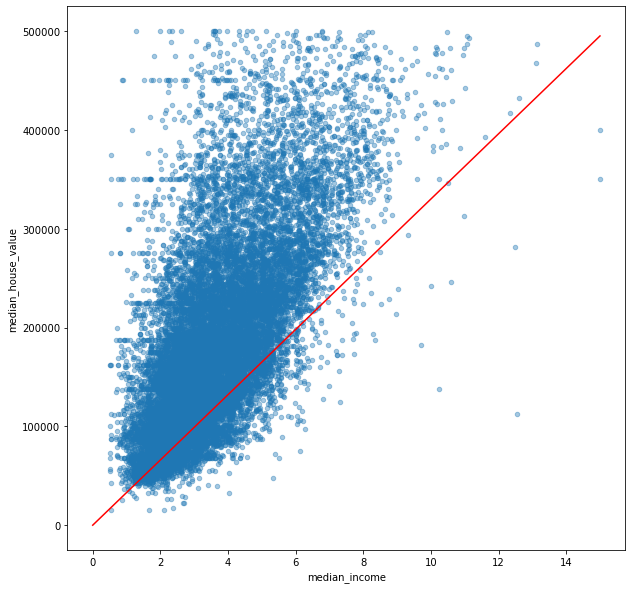

In [14]:
import numpy as np
housing.plot(kind="scatter",y="median_house_value",x="median_income",figsize=(10,10),alpha=0.4)
x=np.linspace(0,15)
plt.plot(x,50000*0.66*x,'r')
plt.show()

# New feature constructing 


In [15]:
print('Lets create new features. These are the existing features.\n')
print(housing.columns.values)

Lets create new features. These are the existing features.

['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'median_house_value' 'ocean_proximity']


In [16]:
print('Lets create some new features. These new features may help the ML algorithms learn better.\n')
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["total_bedrooms_per_household"]=housing["total_bedrooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["total_population_per_household"]= housing["population"]/housing["households"]
for n in range(len(housing.columns)):
    if n>=len(housing.columns)-4:
        print('\033[1m'+housing.columns.values[n]+'\033[0m')
    else :
        print(housing.columns.values[n])

Lets create some new features. These new features may help the ML algorithms learn better.

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity
rooms_per_household
total_bedrooms_per_household
bedrooms_per_room
total_population_per_household


In [17]:
corr_matrix = housing.corr()
print("Corellation table with the new features.\n")
print(corr_matrix["median_house_value"].sort_values(ascending=False))

Corellation table with the new features.

median_house_value                1.000000
median_income                     0.661027
total_rooms                       0.151571
rooms_per_household               0.113171
households                        0.099076
total_bedrooms                    0.079721
population                        0.020692
housing_median_age                0.015306
total_population_per_household   -0.020283
longitude                        -0.021329
total_bedrooms_per_household     -0.060625
latitude                         -0.172760
bedrooms_per_room                -0.229234
Name: median_house_value, dtype: float64


In [18]:
print('The ocean proximity feature is a Dtype value', housing['ocean_proximity'].values,"\nWe can encode it but then there will be corellation between the labels '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'.\nThe best solution to 1hot encode them. ")

The ocean proximity feature is a Dtype value ['NEAR BAY' 'NEAR BAY' 'NEAR BAY' ... 'INLAND' 'INLAND' 'INLAND'] 
We can encode it but then there will be corellation between the labels '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'.
The best solution to 1hot encode them. 


In [19]:
ocean_proximity_cat = housing[["ocean_proximity"]]
from sklearn.preprocessing import OneHotEncoder
proximity_encoder = OneHotEncoder()
ocean_proximity_cat_1hot = proximity_encoder.fit_transform(ocean_proximity_cat)
#print(proximity_encoder.categories_)

In [20]:
#proximity_encoder.categories_
one_hot_matrix = ocean_proximity_cat_1hot.toarray()
one_hot_matrix_transpose = np.transpose(one_hot_matrix)
for i in range(len(proximity_encoder.categories_[0])):
    housing[proximity_encoder.categories_[0][i]] = one_hot_matrix_transpose[i]
housing = housing.drop("ocean_proximity", axis=1)    

In [21]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,total_bedrooms_per_household,bedrooms_per_room,total_population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.023810,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.971880,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,4.294118,1.117647,0.260274,2.026891,0.0,0.0,0.0,1.0,0.0
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,4.242424,1.071970,0.252679,2.640152,0.0,0.0,0.0,1.0,0.0
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,5.343675,1.085919,0.203216,2.362768,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,1.133333,0.224625,2.560606,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,1.315789,0.215208,3.122807,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,1.120092,0.215173,2.325635,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,1.171920,0.219892,2.123209,0.0,1.0,0.0,0.0,0.0


In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18379 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   longitude                       18379 non-null  float64
 1   latitude                        18379 non-null  float64
 2   housing_median_age              18379 non-null  float64
 3   total_rooms                     18379 non-null  float64
 4   total_bedrooms                  18379 non-null  float64
 5   population                      18379 non-null  float64
 6   households                      18379 non-null  float64
 7   median_income                   18379 non-null  float64
 8   median_house_value              18379 non-null  float64
 9   rooms_per_household             18379 non-null  float64
 10  total_bedrooms_per_household    18379 non-null  float64
 11  bedrooms_per_room               18379 non-null  float64
 12  total_population_per_household  

In [23]:
features = list(housing.columns)
features.remove('median_house_value')
features.append('median_house_value')
df = housing[features]
df = df.reset_index()
df = df.drop('index',axis=1)



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   longitude                       18379 non-null  float64
 1   latitude                        18379 non-null  float64
 2   housing_median_age              18379 non-null  float64
 3   total_rooms                     18379 non-null  float64
 4   total_bedrooms                  18379 non-null  float64
 5   population                      18379 non-null  float64
 6   households                      18379 non-null  float64
 7   median_income                   18379 non-null  float64
 8   rooms_per_household             18379 non-null  float64
 9   total_bedrooms_per_household    18379 non-null  float64
 10  bedrooms_per_room               18379 non-null  float64
 11  total_population_per_household  18379 non-null  float64
 12  <1H OCEAN                       

In [25]:
def find_most_correlated(df,correlation_percentage):
    most_correlated_table=[]
    corr_matrix = df.corr()["median_house_value"]
    limit = correlation_percentage
    for i in range(len(df.columns)):
        if abs(corr_matrix[i])>=limit:
            most_correlated_table.append(df.columns[i])
    #print("Correlation to median house value greater than",limit,"\n")#,attributes) 
    table = df[most_correlated_table].corr()["median_house_value"].sort_values(ascending=False)
    return (most_correlated_table,table)

p = 0.1
most_correlated = find_most_correlated(df,0.1)[0]  

print("Correlation to median house value greater than",0.1,"\n")#,attributes) 
print(find_most_correlated(df,0.1)[1]  )
print("\nMost correlated features to median house value for training are :", ', '.join(most_correlated[:-1]))

Correlation to median house value greater than 0.1 

median_house_value     1.000000
median_income          0.661027
<1H OCEAN              0.317285
total_rooms            0.151571
NEAR OCEAN             0.147096
rooms_per_household    0.113171
NEAR BAY               0.110568
latitude              -0.172760
bedrooms_per_room     -0.229234
INLAND                -0.500366
Name: median_house_value, dtype: float64

Most correlated features to median house value for training are : latitude, total_rooms, median_income, rooms_per_household, bedrooms_per_room, <1H OCEAN, INLAND, NEAR BAY, NEAR OCEAN


labels = features[:len(features)-1]
target = features[len(features)-1:][0]
print('features:',', '.join(labels))
print('\ntarget:',target)

In [26]:
def standardise(df,i):
    array=list((df[df.columns[i]]-np.mean(df[df.columns[i]]))/np.std(df[df.columns[i]]))
    return array          
    
def normalise(df,i):
    array=list(df[df.columns[i]]-df[df.columns[i]].min())/(df[df.columns[i]].max()-df[df.columns[i]].min())
    return array
               
df_standardised = pd.DataFrame()
for i in range(len(df.columns)-1): 
    df_standardised[df.columns[i]] = standardise(df,i)    
df_standardised['median_house_value'] = df['median_house_value']

df_normalised = pd.DataFrame()
for i in range(len(df.columns)-1): 
    df_normalised[df.columns[i]] = normalise(df,i)     
df_normalised['median_house_value'] = df['median_house_value']    

In [27]:
dataframes_dict ={"dataframe": df, # linear model
                 "standardised dataframe": df_standardised, # neighbors
                 "normalised dataframe": df_normalised , #decisiontree
                }

In [28]:
percentage = [0,0.1,0.2]
for p in percentage:
    most_correlated_features = find_most_correlated(df,p)[0][:-1]
    print("For correlation percentage more than",p*100,"% there are",len(most_correlated_features),'features :', ", ".join(most_correlated_features),'\n')

For correlation percentage more than 0 % there are 17 features : longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, rooms_per_household, total_bedrooms_per_household, bedrooms_per_room, total_population_per_household, <1H OCEAN, INLAND, ISLAND, NEAR BAY, NEAR OCEAN 

For correlation percentage more than 10.0 % there are 9 features : latitude, total_rooms, median_income, rooms_per_household, bedrooms_per_room, <1H OCEAN, INLAND, NEAR BAY, NEAR OCEAN 

For correlation percentage more than 20.0 % there are 4 features : median_income, bedrooms_per_room, <1H OCEAN, INLAND 



In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm

ML_models_dict ={"LinearRegression": LinearRegression(), # linear model
                 "KNeighbors": KNeighborsRegressor(), # neighbors
                 "Decision Tree": DecisionTreeRegressor() , #decisiontree
                 "RandomForest": RandomForestRegressor(), # tree-based
                 "SVR": svm.SVR() # SVR 
                }

def standardise(df,i):
    array=list((df[df.columns[i]]-np.mean(df[df.columns[i]]))/np.std(df[df.columns[i]]))
    return array          
    
def normalise(df,i):
    array=list(df[df.columns[i]]-df[df.columns[i]].min())/(df[df.columns[i]].max()-df[df.columns[i]].min())
    return array
               
df_standardised = pd.DataFrame()
for i in range(len(df.columns)-1): 
    df_standardised[df.columns[i]] = standardise(df,i)    
df_standardised['median_house_value'] = df['median_house_value']

df_normalised = pd.DataFrame()
for i in range(len(df.columns)-1): 
    df_normalised[df.columns[i]] = normalise(df,i)     
df_normalised['median_house_value'] = df['median_house_value'] 


def run_and_evaluate_ML_model_with_stratified_shuffle_split(dataframe, model, standardised = False, normalised = False):
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.model_selection import StratifiedShuffleSplit
    
    data_bins=[0., 1.5, 3.0, 4.5, 6., np.inf]
    
    if standardised == True:
        
        #def standardise(df,i):
         #   array=list((df[df.columns[i]]-np.mean(df[df.columns[i]]))/np.std(df[df.columns[i]]))
          #  return (array)  
        
        dataframe_standardised = pd.DataFrame()
        for i in range(len(dataframe.columns)-1): 
            dataframe_standardised[dataframe.columns[i]] = standardise(dataframe,i)    
        dataframe_standardised['median_house_value'] = dataframe['median_house_value']
        standardised_bins = (data_bins-dataframe.median_income.mean())/dataframe.median_income.std()
        data_bins = standardised_bins
        
    if normalised == True:
        
        #def normalise(df,i):
         #   array=list(df[df.columns[i]]-df[df.columns[i]].min())/(df[df.columns[i]].max()-df[df.columns[i]].min())
        #return (array)
    
        dataframe_normalised = pd.DataFrame() 
        for i in range(len(dataframe.columns)-1): 
            dataframe_normalised[df.columns[i]] = normalise(dataframe,i)     
        dataframe_normalised['median_house_value'] = dataframe['median_house_value'] 
        normalised_bins = (bins-df.median_income.min())/(df.median_income.max()-df.median_income.min())
        data_bins = normalised_bins

    
    dataframe["income_cat"] = pd.cut(dataframe["median_income"],
                            bins=data_bins,
                            labels=['1', '2', '3', '4', '5'])
    
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    
    for train_index, test_index in split.split(dataframe, dataframe["income_cat"]):
        strat_train_set = dataframe.iloc[dataframe.index.get_indexer(train_index)]
        strat_test_set = dataframe.iloc[dataframe.index.get_indexer(test_index)]
            
    
    #if standardise == True:
     #   print('no standardise')
      #  standardised_dataframe = pd.DataFrame()
       # for i in range(len(.columns)-1): 
        #    strat_train_set_standardised[strat_train_set.columns[i]] = standardise(strat_train_set,i)  
         #   strat_test_set = 
          #  standardised_dataframe[df.columns[i]] = standardise(df,i)    
           # standardised_dataframe['median_house_value'] = df['median_house_value']

    #print(strat_train_set.columns)
    train_set = strat_train_set
    test_set = strat_test_set
    #dataframe = dataframe.drop(dataframe[dataframe.columns[-1:]])
    attributes = dataframe.columns[:-2]
    target = dataframe.columns[-2:-1]
    #print(attributes,target)
    model.fit( train_set[attributes], train_set[target].values.ravel() )
    y_pred = model.predict(test_set[attributes])
    y_true = test_set[target].values
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    performance = 1-np.mean((y_pred-y_true)/y_true)
    #print(dataframe.columns)
    #dataframe = dataframe.drop('income_cat',axis=1)
    return (round(r2,2),round(np.sqrt(mse),2),round(mae,2),round(performance,2))


#DF = df_normalised
#print(run_and_evaluate_ML_model_with_stratified_shuffle_split(DF, LinearRegression(), normalised=True))
#DF = DF.drop('income_cat',axis=1)
#df.columns

suma = pd.DataFrame()
for key,model in ML_models_dict.items():
    r2, mse, mae, performance = run_and_evaluate_ML_model_with_stratified_shuffle_split(df, model)
    df = df.drop('income_cat',axis=1)
    print(key,':',r2, mse, mae, performance)
    suma[key] = r2, mse, mae, performance
suma    

ML_models_dict.items()

for key,model in ML_models_dict.items():
    print(key,model)

LinearRegression : 0.64 57325.46 41834.97 0.69
KNeighbors : 0.15 87566.95 68588.8 0.68
Decision Tree : 0.51 66297.1 43814.83 0.68
RandomForest : 0.78 44165.81 29357.67 0.68
SVR : -0.03 96731.81 74788.02 0.81

gathering = pd.DataFrame({'metric': ['r2 regression score function', 'root of mean squared error',
                                     'mean absolute error', 'performance']})
for key,model in ML_models_dict.items():
    r2, mse, mae, performance = run_and_evaluate_ML_model_with_stratified_shuffle_split(df, model)
    df = df.drop('income_cat',axis=1)
    print(key,':',r2, mse, mae, performance)
    gathering[key] = [r2, mse, mae, performance]
gathering 

gathering = pd.DataFrame({'metric': ['r2 regression score function', 'root of mean squared error',
                                     'mean absolute error', 'performance']})
for key,model in ML_models_dict.items():
    r2, mse, mae, performance = run_and_evaluate_ML_model_with_stratified_shuffle_split(df, model,normalised=True)
    df = df.drop('income_cat',axis=1)
    print(key,':',r2, mse, mae, performance)
    gathering[key] = [r2, mse, mae, performance]
gathering 

gathering = pd.DataFrame({'metric': ['r2 regression score function', 'root of mean squared error',
                                     'mean absolute error', 'performance']})
for key,model in ML_models_dict.items():
    r2, mse, mae, performance = run_and_evaluate_ML_model_with_stratified_shuffle_split(df, model,standardised=True)
    df = df.drop('income_cat',axis=1)
    print(key,':',r2, mse, mae, performance)
    gathering[key] = [r2, mse, mae, performance]
gathering

# what is important is number of important features

gathering = pd.DataFrame({'metric': ['r2 regression score function', 'root of mean squared error',
                                     'mean absolute error', 'performance']})
for key,model in ML_models_dict.items():
    r2, mse, mae, performance = run_and_evaluate_ML_model_with_stratified_shuffle_split(df, model)
    df = df.drop('income_cat',axis=1)
    print(key,':',r2, mse, mae, performance)
    gathering[key] = [r2, mse, mae, performance]
print(gathering) 

DF_backup = df
most_correlated = find_most_correlated(df,0.0)[0] 
#print(most_correlated)
DF = df[most_correlated]
gathering = pd.DataFrame({'metric': ['r2 regression score function', 'root of mean squared error',
                                     'mean absolute error', 'performance']})
for key,model in ML_models_dict.items():
    r2, mse, mae, performance = run_and_evaluate_ML_model_with_stratified_shuffle_split(DF, model)
    DF = DF.drop('income_cat',axis=1)
    print(key,':',r2, mse, mae, performance)
    gathering[key] = [r2, mse, mae, performance]
gathering

In [30]:
p = 0.25
most_correlated_features = find_most_correlated(df,p)[0][:-1]
print("For correlation percentage more than",p*100,"% there are",len(most_correlated_features),'features :', ", ".join(most_correlated_features),'\n')

DF_backup = df
df = df[find_most_correlated(df,p)[0]]

df["income_cat"] = pd.cut(df["median_income"],
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=['1', '2', '3', '4', '5'])
    
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    
for train_index, test_index in split.split(df, df["income_cat"]):
        strat_train_set = df.iloc[df.index.get_indexer(train_index)]
        strat_test_set = df.iloc[df.index.get_indexer(test_index)]

train_set = strat_train_set
test_set = strat_test_set
attributes = df.columns[:-2]
target = df.columns[-2:-1]
regress = RandomForestRegressor()
regress.fit( train_set[attributes], train_set[target].values.ravel() )            
df = df.drop(df[df.columns[-1:]],axis=1)        
#df.columns
#df = DF_backup

For correlation percentage more than 25.0 % there are 3 features : median_income, <1H OCEAN, INLAND 



/Users/Dimitris/opt/miniconda3/envs/tif285-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [31]:
import random
r = random.randrange(0,len(df))
#print(r)
data = df[df.columns[:-1]].loc[r]
print('Predicted value is', round(regress.predict([data])[0],1),', whereas real value is',df[df.columns[-1]].loc[r])


Predicted value is 244621.0 , whereas real value is 245900.0


In [32]:
df = DF_backup